/## TODO - Atualizar com as dogeCoin
<h3>Resumo do que foi feito:</h3>

<h4>Bitcon:</h4>

Foi usada a base do link: https://www.kaggle.com/mczielinski/bitcoin-historical-data?select=bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv com a base para os bitcoin. Ela aparenta ter a contação de todas as operações feitas de 2012 a 2021, mas basicamente é pego minuto a minuto. 

Para tratar a base foram apagados linhas que tinham todos os valores de Open	High	Low	Close	Volume_(BTC)	Volume_(Currency)	Weighted_Price nulos e foi transformado a coluna de tempo de timestamp para datatime. Com a datas no formato datatime foi retirado o time e deixei apenas o ano, dia e mês.

A base foi modificada para pegar o valor diario da contação. O maior e menor valor no dia pra usar como a variação máximo do ativo no dia. 

<h4>Elon Musk tweets:</h4>

foi utilizada a base do link: https://www.kaggle.com/ayhmrba/elon-musk-tweets-2010-2021. Ela contém (teoricamente) todos os tweets do Elon Musk de 2010 à 2021.

As datas foram modificadsa para deixar apenas o ano, dia e mês. Foi retirado as colunas que não tinha interesse e ficando apenas as colunas 'nretweets','nlikes','date','tweet' e 'nreplies'.

Foi criada uma base com os tweets que tinham refências as seguintes palavras:  bitcoin, bitcoins, Bitcoins, Bitcoin crypto, cryptocurrency, Crypto, Cryptocurrency.




In [1]:
#imports 
#Tirando os warnings
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import balanced_accuracy_score

In [2]:
# controla tamanho geral das figuras no matplotlib/seaborn
TAMANHO_GERAL = [15, 10]
plt.rcParams['figure.figsize'] = TAMANHO_GERAL
sns.set(rc={'figure.figsize' : TAMANHO_GERAL})

In [3]:

# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
 
    elif sentiment_dict['compound'] <= - 0.05 :
         return  "Negative"
 
    else :
         return "Neutral"
 

<h1> Base do historico dos preço do bitcoin</h1>

In [4]:
#Caminho para o data set
# https://www.kaggle.com/mczielinski/bitcoin-historical-data?select=bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv
df = pd.read_csv('Data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [5]:
#Verificando casos vazios por coluna/atributo
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [6]:
#descartando os dados vazios
df = df.dropna(how="all",subset=df.columns[1:])
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [7]:
#tranformando o timestamp em datatime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [8]:
df = df.set_index("Timestamp")

In [9]:
df['2014-01-01':'2014-02-01']

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2014-01-01 00:00:00,732.00,732.00,732.00,732.00,4.599562,3366.879047,732.000000
2014-01-01 00:02:00,732.01,732.75,729.01,729.01,1.138530,830.438062,729.394976
2014-01-01 00:03:00,730.24,732.76,730.24,732.76,0.121000,88.596624,732.203507
2014-01-01 00:04:00,732.76,734.00,732.76,734.00,52.120000,38251.836202,733.918576
2014-01-01 00:05:00,733.70,734.00,730.51,734.00,2.710080,1984.290334,732.188752
...,...,...,...,...,...,...,...
2014-02-01 23:54:00,813.24,813.24,813.24,813.24,0.941409,765.591089,813.240000
2014-02-01 23:55:00,813.23,813.23,813.23,813.23,0.132942,108.112057,813.230000
2014-02-01 23:56:00,813.23,813.23,813.03,813.23,0.338572,275.289949,813.092025


In [10]:
#Avaliando só em um mês

#data inicial
dataIni='2018-1-1'
#data final
dataFim='2021-4-1'

In [11]:
#criando um dataset com os dados do intervalo das datas
df = df[dataIni : dataFim] 
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13880.00,13906.37,13841.00,13841.01,4.967997,69030.718890,13895.081610
2018-01-01 00:01:00,13841.01,13890.43,13841.01,13890.43,1.665850,23064.082359,13845.237237
2018-01-01 00:02:00,13846.64,13890.35,13846.64,13847.51,0.269346,3739.690844,13884.349123
2018-01-01 00:03:00,13847.51,13874.92,13823.19,13823.19,1.155274,15986.279494,13837.650132
2018-01-01 00:04:00,13823.19,13826.75,13803.20,13803.20,0.646691,8930.465767,13809.482390
...,...,...,...,...,...,...,...
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496


In [12]:
df.index.date

array([datetime.date(2018, 1, 1), datetime.date(2018, 1, 1),
       datetime.date(2018, 1, 1), ..., datetime.date(2021, 3, 30),
       datetime.date(2021, 3, 30), datetime.date(2021, 3, 31)],
      dtype=object)

In [13]:
df["Date"] = df.index.date

In [14]:
df.groupby("Date").max()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Date,,,,,,,
2018-01-01,13941.49,13941.75,13881.79,13941.49,94.230516,1.279566e+06,13932.655493
2018-01-02,15251.70,15257.53,15190.00,15253.00,308.037285,4.081409e+06,15228.646803
2018-01-03,15437.65,15500.00,15365.00,15437.65,226.192616,3.366312e+06,15461.751378
2018-01-04,15429.11,15430.27,15358.02,15394.96,182.825465,2.726120e+06,15387.413701
2018-01-05,17089.99,17200.00,17075.65,17090.03,231.114977,3.954660e+06,17111.223707
...,...,...,...,...,...,...,...
2021-03-27,56591.91,56686.15,56506.66,56591.90,50.691653,2.809330e+06,56563.515427
2021-03-28,56497.92,56573.04,56497.92,56545.59,24.259556,1.356818e+06,56521.867273
2021-03-29,58304.20,58402.68,58280.05,58309.35,60.555949,3.502284e+06,58360.318459


In [15]:
df.groupby("Date").min().add_suffix('_min')

,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min
Date,,,,,,,
2018-01-01,12840.00,12868.86,12801.38,12839.05,0.003811,51.702883,12823.580565
2018-01-02,12939.99,12950.18,12910.58,12940.00,0.021442,288.478987,12932.761563
2018-01-03,14549.00,14594.58,14546.28,14559.60,0.019167,283.284400,14571.236350
2018-01-04,14192.37,14234.44,14192.37,14192.37,0.088733,1317.076273,14214.643130
2018-01-05,14811.00,14845.00,14810.00,14820.00,0.000589,8.814139,14814.893463
...,...,...,...,...,...,...,...
2021-03-27,53995.00,54032.42,53948.35,54000.00,0.000700,38.484495,53981.092754
2021-03-28,54679.73,54792.40,54677.51,54679.73,0.000690,38.009540,54731.735728
2021-03-29,54919.82,54944.90,54892.42,54915.41,0.000517,28.498713,54909.254762


In [16]:
dfMaxMin_perDay = pd.concat([df.groupby("Date").max().add_suffix('_max'), df.groupby("Date").min().add_suffix('_min')], axis=1)

In [17]:
dfMaxMin_perDay

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min
Date,,,,,,,,,,,,,,
2018-01-01,13941.49,13941.75,13881.79,13941.49,94.230516,1.279566e+06,13932.655493,12840.00,12868.86,12801.38,12839.05,0.003811,51.702883,12823.580565
2018-01-02,15251.70,15257.53,15190.00,15253.00,308.037285,4.081409e+06,15228.646803,12939.99,12950.18,12910.58,12940.00,0.021442,288.478987,12932.761563
2018-01-03,15437.65,15500.00,15365.00,15437.65,226.192616,3.366312e+06,15461.751378,14549.00,14594.58,14546.28,14559.60,0.019167,283.284400,14571.236350
2018-01-04,15429.11,15430.27,15358.02,15394.96,182.825465,2.726120e+06,15387.413701,14192.37,14234.44,14192.37,14192.37,0.088733,1317.076273,14214.643130
2018-01-05,17089.99,17200.00,17075.65,17090.03,231.114977,3.954660e+06,17111.223707,14811.00,14845.00,14810.00,14820.00,0.000589,8.814139,14814.893463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,56591.91,56686.15,56506.66,56591.90,50.691653,2.809330e+06,56563.515427,53995.00,54032.42,53948.35,54000.00,0.000700,38.484495,53981.092754
2021-03-28,56497.92,56573.04,56497.92,56545.59,24.259556,1.356818e+06,56521.867273,54679.73,54792.40,54677.51,54679.73,0.000690,38.009540,54731.735728
2021-03-29,58304.20,58402.68,58280.05,58309.35,60.555949,3.502284e+06,58360.318459,54919.82,54944.90,54892.42,54915.41,0.000517,28.498713,54909.254762


#### dfMaxMin_perDay contém todos os dados "max" e "min" para um determinado dia

<h1>Base de tweets do Elon musk</h1>

In [18]:
#leitura da base 
# https://www.kaggle.com/ayhmrba/elon-musk-tweets-2010-2021
dfElonMusk = pd.read_csv('Data/Dataset_ElonMusk/2021.csv')

In [19]:
dfElonMusk["date"] = pd.to_datetime(dfElonMusk["date"])
dfElonMusk = dfElonMusk.set_index("date")
dfElonMusk = dfElonMusk.rename_axis(index="Date")

In [20]:
dfElonMusk.index = dfElonMusk.index.date

In [21]:
dfElonMusk

,Unnamed: 0,id,conversation_id,created_at,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
2021-03-22,0,1373819373090050048,1373669212271566858,1.616379e+12,0,NaN,@bluemoondance74 @NASASpaceflight Going well. ...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'bluemoondance74', 'name': 'R...",NaN,NaN,NaN,NaN
2021-03-21,1,1373735946244431873,1373669212271566858,1.616359e+12,0,NaN,@NASASpaceflight Hopefully will happen this de...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'NASASpaceflight', 'name': 'C...",NaN,NaN,NaN,NaN
2021-03-21,2,1373555480870621188,1373328330041229312,1.616316e+12,0,NaN,@newscientist True,en,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'newscientist', 'name': 'New ...",NaN,NaN,NaN,NaN
2021-03-21,3,1373507545315172357,1373263440391864323,1.616305e+12,0,NaN,@cleantechnica I am accumulating resources to ...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'cleantechnica', 'name': 'Cle...",NaN,NaN,NaN,NaN
2021-03-21,4,1373492611231535111,1373357995288051718,1.616301e+12,0,NaN,@CathieDWood When vast amounts of manufacturin...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CathieDWood', 'name': 'Cathi...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-03,12334,142881284019060736,142881284019060736,1.322901e+12,0,NaN,That was a total non sequitur btw,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2011-12-03,12335,142880871391838208,142880871391838208,1.322900e+12,0,NaN,"Great Voltaire quote, arguably better than Twa...",en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2011-12-01,12336,142188458125963264,142188458125963264,1.322735e+12,0,NaN,I made the volume on the Model S http://t.co/...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2011-12-01,12337,142179928203460608,142179928203460608,1.322733e+12,0,NaN,Went to Iceland on Sat to ride bumper cars on ...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [22]:
#Colunas/atributo
dfElonMusk.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [23]:
dfElonMusk = dfElonMusk.dropna(how="all", axis = 1)
dfElonMusk

,Unnamed: 0,id,conversation_id,created_at,timezone,tweet,language,hashtags,cashtags,user_id,...,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,reply_to
2021-03-22,0,1373819373090050048,1373669212271566858,1.616379e+12,0,@bluemoondance74 @NASASpaceflight Going well. ...,en,[],[],44196397,...,[],0,NaN,False,2678,234,134,NaN,None,"[{'screen_name': 'bluemoondance74', 'name': 'R..."
2021-03-21,1,1373735946244431873,1373669212271566858,1.616359e+12,0,@NASASpaceflight Hopefully will happen this de...,en,[],[],44196397,...,[],0,NaN,False,7967,535,570,NaN,None,"[{'screen_name': 'NASASpaceflight', 'name': 'C..."
2021-03-21,2,1373555480870621188,1373328330041229312,1.616316e+12,0,@newscientist True,en,[],[],44196397,...,[],0,NaN,False,15510,539,409,NaN,None,"[{'screen_name': 'newscientist', 'name': 'New ..."
2021-03-21,3,1373507545315172357,1373263440391864323,1.616305e+12,0,@cleantechnica I am accumulating resources to ...,en,[],[],44196397,...,[],0,NaN,False,143476,10500,12483,NaN,None,"[{'screen_name': 'cleantechnica', 'name': 'Cle..."
2021-03-21,4,1373492611231535111,1373357995288051718,1.616301e+12,0,@CathieDWood When vast amounts of manufacturin...,en,[],[],44196397,...,[],0,NaN,False,6568,376,425,NaN,None,"[{'screen_name': 'CathieDWood', 'name': 'Cathi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-03,12334,142881284019060736,142881284019060736,1.322901e+12,0,That was a total non sequitur btw,en,[],[],44196397,...,[],0,NaN,False,53,31,6,NaN,None,[]
2011-12-03,12335,142880871391838208,142880871391838208,1.322900e+12,0,"Great Voltaire quote, arguably better than Twa...",en,[],[],44196397,...,[],0,NaN,False,29,7,25,NaN,None,[]
2011-12-01,12336,142188458125963264,142188458125963264,1.322735e+12,0,I made the volume on the Model S http://t.co/...,en,[],[],44196397,...,[],0,NaN,False,78,31,9,NaN,None,[]
2011-12-01,12337,142179928203460608,142179928203460608,1.322733e+12,0,Went to Iceland on Sat to ride bumper cars on ...,en,[],[],44196397,...,['https://pbs.twimg.com/media/Afkf5DMCAAEJGFr....,1,https://pbs.twimg.com/media/Afkf5DMCAAEJGFr.jpg,False,189,32,15,NaN,None,[]


In [24]:
#colunas desejadas
quero = ['nretweets','nlikes','tweet','nreplies']

In [25]:
dfElonMusk = dfElonMusk[quero]

In [26]:
# incluir palavras sobre finanças também? money...

In [27]:
dfElonMusk[dfElonMusk["tweet"].str.contains("bitcoin|bitcoins|Bitcoins|Bitcoin|crypto|cryptocurrency|Crypto|Cryptocurrency|btc|blockchain|Blockchain" , na=False)].shape

(33, 4)

In [28]:
#linhas em que são citados o bitcoins
dfElonMusk_Bitcoin = dfElonMusk[dfElonMusk["tweet"].str.contains("bitcoin|bitcoins|Bitcoins|Bitcoin|crypto|cryptocurrency|Crypto|Cryptocurrency|btc|blockchain|Blockchain" , na=False)]
dfElonMusk_Bitcoin

,nretweets,nlikes,tweet,nreplies
2021-03-12,17945,244893,BTC (Bitcoin) is an anagram of TBC(The Boring ...,12079
2021-03-02,17037,200272,Scammers &amp; crypto should get a room,9585
2021-02-20,24313,154807,Cryptocurrency explained https://t.co/kUXaXx8a1R,11112
2021-02-20,21597,278356,Heard a rumor some crypto coin was pegging the...,17594
2021-02-20,10548,86076,@PeterSchiff An email saying you have gold is ...,2926
2021-02-19,1101,8905,"@realfuckingnews @business Somehow, a hash tex...",993
2021-02-19,6396,35544,"@business To be clear, I am *not* an investor,...",2210
2021-02-19,3521,27882,@business Tesla’s action is not directly refle...,1001
2021-02-10,4777,29352,@freewalletorg Any crypto wallet that won’t gi...,2083
2021-02-09,177,3341,@CryptoShrikar @CoinDesk @Tesla @Dan_Z_Palmer 🤣🤣,260


In [29]:
#Quantidade de tweets encontrada
dfElonMusk_Bitcoin.shape[0]

33

In [30]:
dfElonMusk_Bitcoin

,nretweets,nlikes,tweet,nreplies
2021-03-12,17945,244893,BTC (Bitcoin) is an anagram of TBC(The Boring ...,12079
2021-03-02,17037,200272,Scammers &amp; crypto should get a room,9585
2021-02-20,24313,154807,Cryptocurrency explained https://t.co/kUXaXx8a1R,11112
2021-02-20,21597,278356,Heard a rumor some crypto coin was pegging the...,17594
2021-02-20,10548,86076,@PeterSchiff An email saying you have gold is ...,2926
2021-02-19,1101,8905,"@realfuckingnews @business Somehow, a hash tex...",993
2021-02-19,6396,35544,"@business To be clear, I am *not* an investor,...",2210
2021-02-19,3521,27882,@business Tesla’s action is not directly refle...,1001
2021-02-10,4777,29352,@freewalletorg Any crypto wallet that won’t gi...,2083
2021-02-09,177,3341,@CryptoShrikar @CoinDesk @Tesla @Dan_Z_Palmer 🤣🤣,260


In [31]:
dfMaxMin_perDay

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min
Date,,,,,,,,,,,,,,
2018-01-01,13941.49,13941.75,13881.79,13941.49,94.230516,1.279566e+06,13932.655493,12840.00,12868.86,12801.38,12839.05,0.003811,51.702883,12823.580565
2018-01-02,15251.70,15257.53,15190.00,15253.00,308.037285,4.081409e+06,15228.646803,12939.99,12950.18,12910.58,12940.00,0.021442,288.478987,12932.761563
2018-01-03,15437.65,15500.00,15365.00,15437.65,226.192616,3.366312e+06,15461.751378,14549.00,14594.58,14546.28,14559.60,0.019167,283.284400,14571.236350
2018-01-04,15429.11,15430.27,15358.02,15394.96,182.825465,2.726120e+06,15387.413701,14192.37,14234.44,14192.37,14192.37,0.088733,1317.076273,14214.643130
2018-01-05,17089.99,17200.00,17075.65,17090.03,231.114977,3.954660e+06,17111.223707,14811.00,14845.00,14810.00,14820.00,0.000589,8.814139,14814.893463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,56591.91,56686.15,56506.66,56591.90,50.691653,2.809330e+06,56563.515427,53995.00,54032.42,53948.35,54000.00,0.000700,38.484495,53981.092754
2021-03-28,56497.92,56573.04,56497.92,56545.59,24.259556,1.356818e+06,56521.867273,54679.73,54792.40,54677.51,54679.73,0.000690,38.009540,54731.735728
2021-03-29,58304.20,58402.68,58280.05,58309.35,60.555949,3.502284e+06,58360.318459,54919.82,54944.90,54892.42,54915.41,0.000517,28.498713,54909.254762


Análise rápida do bitcoin, usando os dois dataframes anteriores (com index diário)

A interseção das datas é o dataset dos tweets de bitcoin (o dataset maior possui todas as datas)

In [32]:
len(list(set(dfMaxMin_perDay.index).intersection(set(dfElonMusk_Bitcoin.index)))), len(set(dfElonMusk_Bitcoin.index))

(25, 25)

In [33]:
lista_de_dias_com_tweet = list(set(dfMaxMin_perDay.index).intersection(set(dfElonMusk_Bitcoin.index)))

In [34]:
dfMaxMin_perDay_OnlyOnTweets = dfMaxMin_perDay.loc[lista_de_dias_com_tweet].sort_index()

In [35]:
dfElonMusk_Bitcoin_OnlyOnTweets = dfElonMusk_Bitcoin.loc[lista_de_dias_com_tweet].sort_index()

In [36]:
dfMaxMin_perDay_OnlyOnTweets.shape

(25, 14)

In [37]:
dfMaxMin_perDay_OnlyOnTweets.columns

Index(['Open_max', 'High_max', 'Low_max', 'Close_max', 'Volume_(BTC)_max',
       'Volume_(Currency)_max', 'Weighted_Price_max', 'Open_min', 'High_min',
       'Low_min', 'Close_min', 'Volume_(BTC)_min', 'Volume_(Currency)_min',
       'Weighted_Price_min'],
      dtype='object')

<AxesSubplot:xlabel='Date', ylabel='Close_max'>

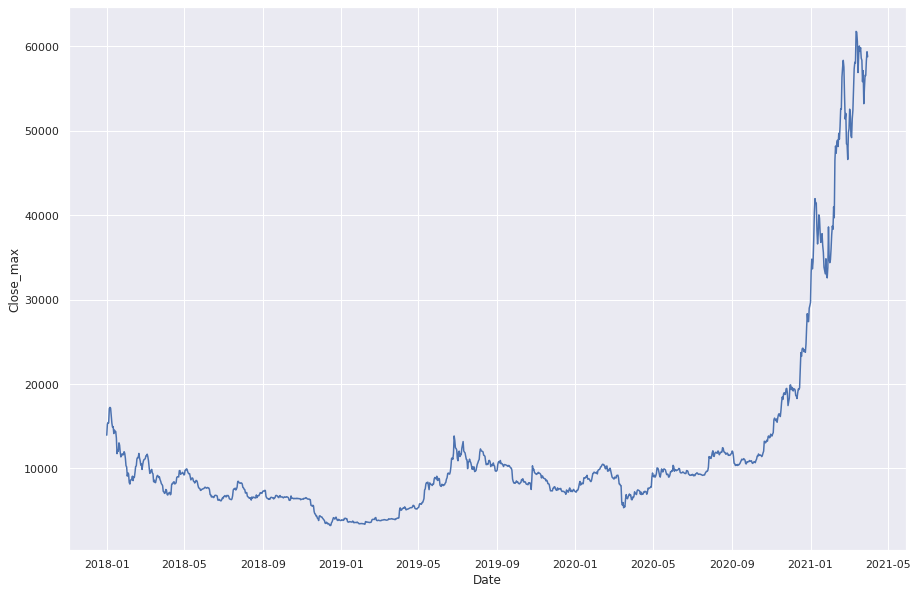

In [38]:
sns.lineplot(data = dfMaxMin_perDay, x = "Date", y = "Close_max")

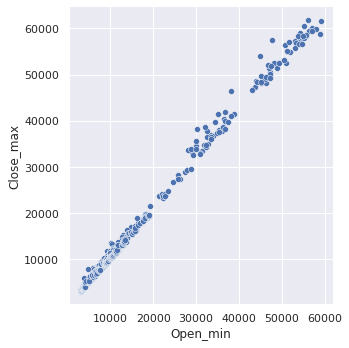

In [39]:
sns.relplot(x="Open_min", y="Close_max", data=dfMaxMin_perDay)

In [40]:
dfMaxMin_perDay.columns

Index(['Open_max', 'High_max', 'Low_max', 'Close_max', 'Volume_(BTC)_max',
       'Volume_(Currency)_max', 'Weighted_Price_max', 'Open_min', 'High_min',
       'Low_min', 'Close_min', 'Volume_(BTC)_min', 'Volume_(Currency)_min',
       'Weighted_Price_min'],
      dtype='object')

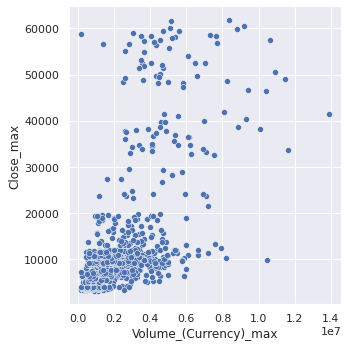

In [41]:
sns.relplot(x="Volume_(Currency)_max", y="Close_max", data=dfMaxMin_perDay)

In [42]:
dfMaxMin_perDay["tweet_de_elon_musk"] = False

In [43]:
dfMaxMin_perDay

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min,tweet_de_elon_musk
Date,,,,,,,,,,,,,,,
2018-01-01,13941.49,13941.75,13881.79,13941.49,94.230516,1.279566e+06,13932.655493,12840.00,12868.86,12801.38,12839.05,0.003811,51.702883,12823.580565,False
2018-01-02,15251.70,15257.53,15190.00,15253.00,308.037285,4.081409e+06,15228.646803,12939.99,12950.18,12910.58,12940.00,0.021442,288.478987,12932.761563,False
2018-01-03,15437.65,15500.00,15365.00,15437.65,226.192616,3.366312e+06,15461.751378,14549.00,14594.58,14546.28,14559.60,0.019167,283.284400,14571.236350,False
2018-01-04,15429.11,15430.27,15358.02,15394.96,182.825465,2.726120e+06,15387.413701,14192.37,14234.44,14192.37,14192.37,0.088733,1317.076273,14214.643130,False
2018-01-05,17089.99,17200.00,17075.65,17090.03,231.114977,3.954660e+06,17111.223707,14811.00,14845.00,14810.00,14820.00,0.000589,8.814139,14814.893463,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,56591.91,56686.15,56506.66,56591.90,50.691653,2.809330e+06,56563.515427,53995.00,54032.42,53948.35,54000.00,0.000700,38.484495,53981.092754,False
2021-03-28,56497.92,56573.04,56497.92,56545.59,24.259556,1.356818e+06,56521.867273,54679.73,54792.40,54677.51,54679.73,0.000690,38.009540,54731.735728,False
2021-03-29,58304.20,58402.68,58280.05,58309.35,60.555949,3.502284e+06,58360.318459,54919.82,54944.90,54892.42,54915.41,0.000517,28.498713,54909.254762,False


In [44]:
dfMaxMin_perDay.loc[lista_de_dias_com_tweet, ["tweet_de_elon_musk"]] = True

In [45]:
dfMaxMin_perDay.loc[lista_de_dias_com_tweet]["tweet_de_elon_musk"]

Date
2020-02-01    True
2019-04-13    True
2018-01-29    True
2021-02-20    True
2019-05-07    True
2021-03-12    True
2020-07-19    True
2019-02-21    True
2020-11-16    True
2021-02-10    True
2020-12-20    True
2021-02-07    True
2020-01-10    True
2018-05-05    True
2018-10-22    True
2019-04-02    True
2020-05-15    True
2021-03-02    True
2018-02-25    True
2018-02-22    True
2021-02-19    True
2021-02-09    True
2020-05-01    True
2018-05-24    True
2021-02-04    True
Name: tweet_de_elon_musk, dtype: bool

In [46]:
dfMaxMin_perDay[dfMaxMin_perDay["tweet_de_elon_musk"] == True]

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min,tweet_de_elon_musk
Date,,,,,,,,,,,,,,,
2018-01-29,11805.00,11820.01,11790.10,11805.00,380.110551,4.318846e+06,11809.685038,10992.00,11024.85,10991.00,10992.00,0.001320,14.836562,11001.519647,True
2018-02-22,10934.99,10935.00,10928.19,10935.00,488.566556,4.993127e+06,10932.218046,9731.28,9739.14,9731.20,9731.31,0.000808,8.419992,9731.891168,True
2018-02-25,9865.00,9883.41,9857.35,9879.98,150.781320,1.462225e+06,9877.754197,9291.77,9299.86,9260.00,9290.08,0.001113,10.716084,9275.592920,True
2018-05-05,9948.97,9948.98,9941.75,9948.97,228.587922,2.240489e+06,9946.602038,9674.01,9674.44,9670.68,9674.01,0.003750,37.124925,9674.044623,True
2018-05-24,7731.93,7733.99,7723.92,7733.99,121.040112,8.968523e+05,7730.548340,7271.17,7289.72,7267.24,7271.20,0.001600,12.126384,7280.613170,True
2018-10-22,6428.05,6429.23,6428.05,6428.05,35.205032,2.250622e+05,6428.050000,6377.11,6381.85,6372.53,6373.59,0.000800,5.117480,6378.054741,True
2019-02-21,3980.39,3989.99,3961.96,3977.00,119.259332,4.622115e+05,3976.806560,3874.00,3874.00,3866.25,3873.04,0.001799,6.995877,3871.232690,True
2019-04-02,5070.00,5080.00,5056.05,5070.00,767.453300,3.805657e+06,5071.956480,4130.64,4132.69,4130.64,4131.66,0.001500,6.214515,4131.600807,True
2019-04-13,5121.50,5122.01,5117.74,5119.46,57.037817,2.892961e+05,5121.018255,5046.32,5047.67,5033.73,5046.31,0.000399,2.035517,5042.128232,True


In [47]:
# será que o dia em que ElonMusk tweet faz com que aconteça algum vies?

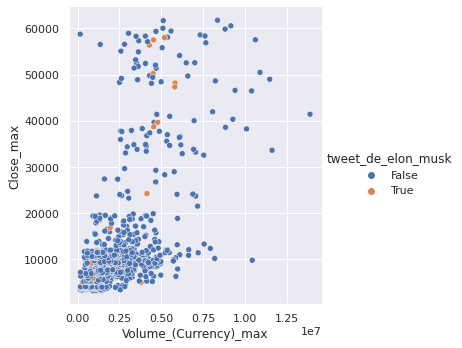

In [48]:
sns.relplot(x="Volume_(Currency)_max", y="Close_max", data=dfMaxMin_perDay, hue = "tweet_de_elon_musk")

Há muitos poucos tweets, mas claramente parece não ter

In [49]:
# sns.pairplot(dfMaxMin_perDay[dfMaxMin_perDay.columns[-3:]], hue = "tweet_de_elon_musk")

Depois, usar um hue de análise de sentimentos médio (categorias: positivo/neutro/negativo)

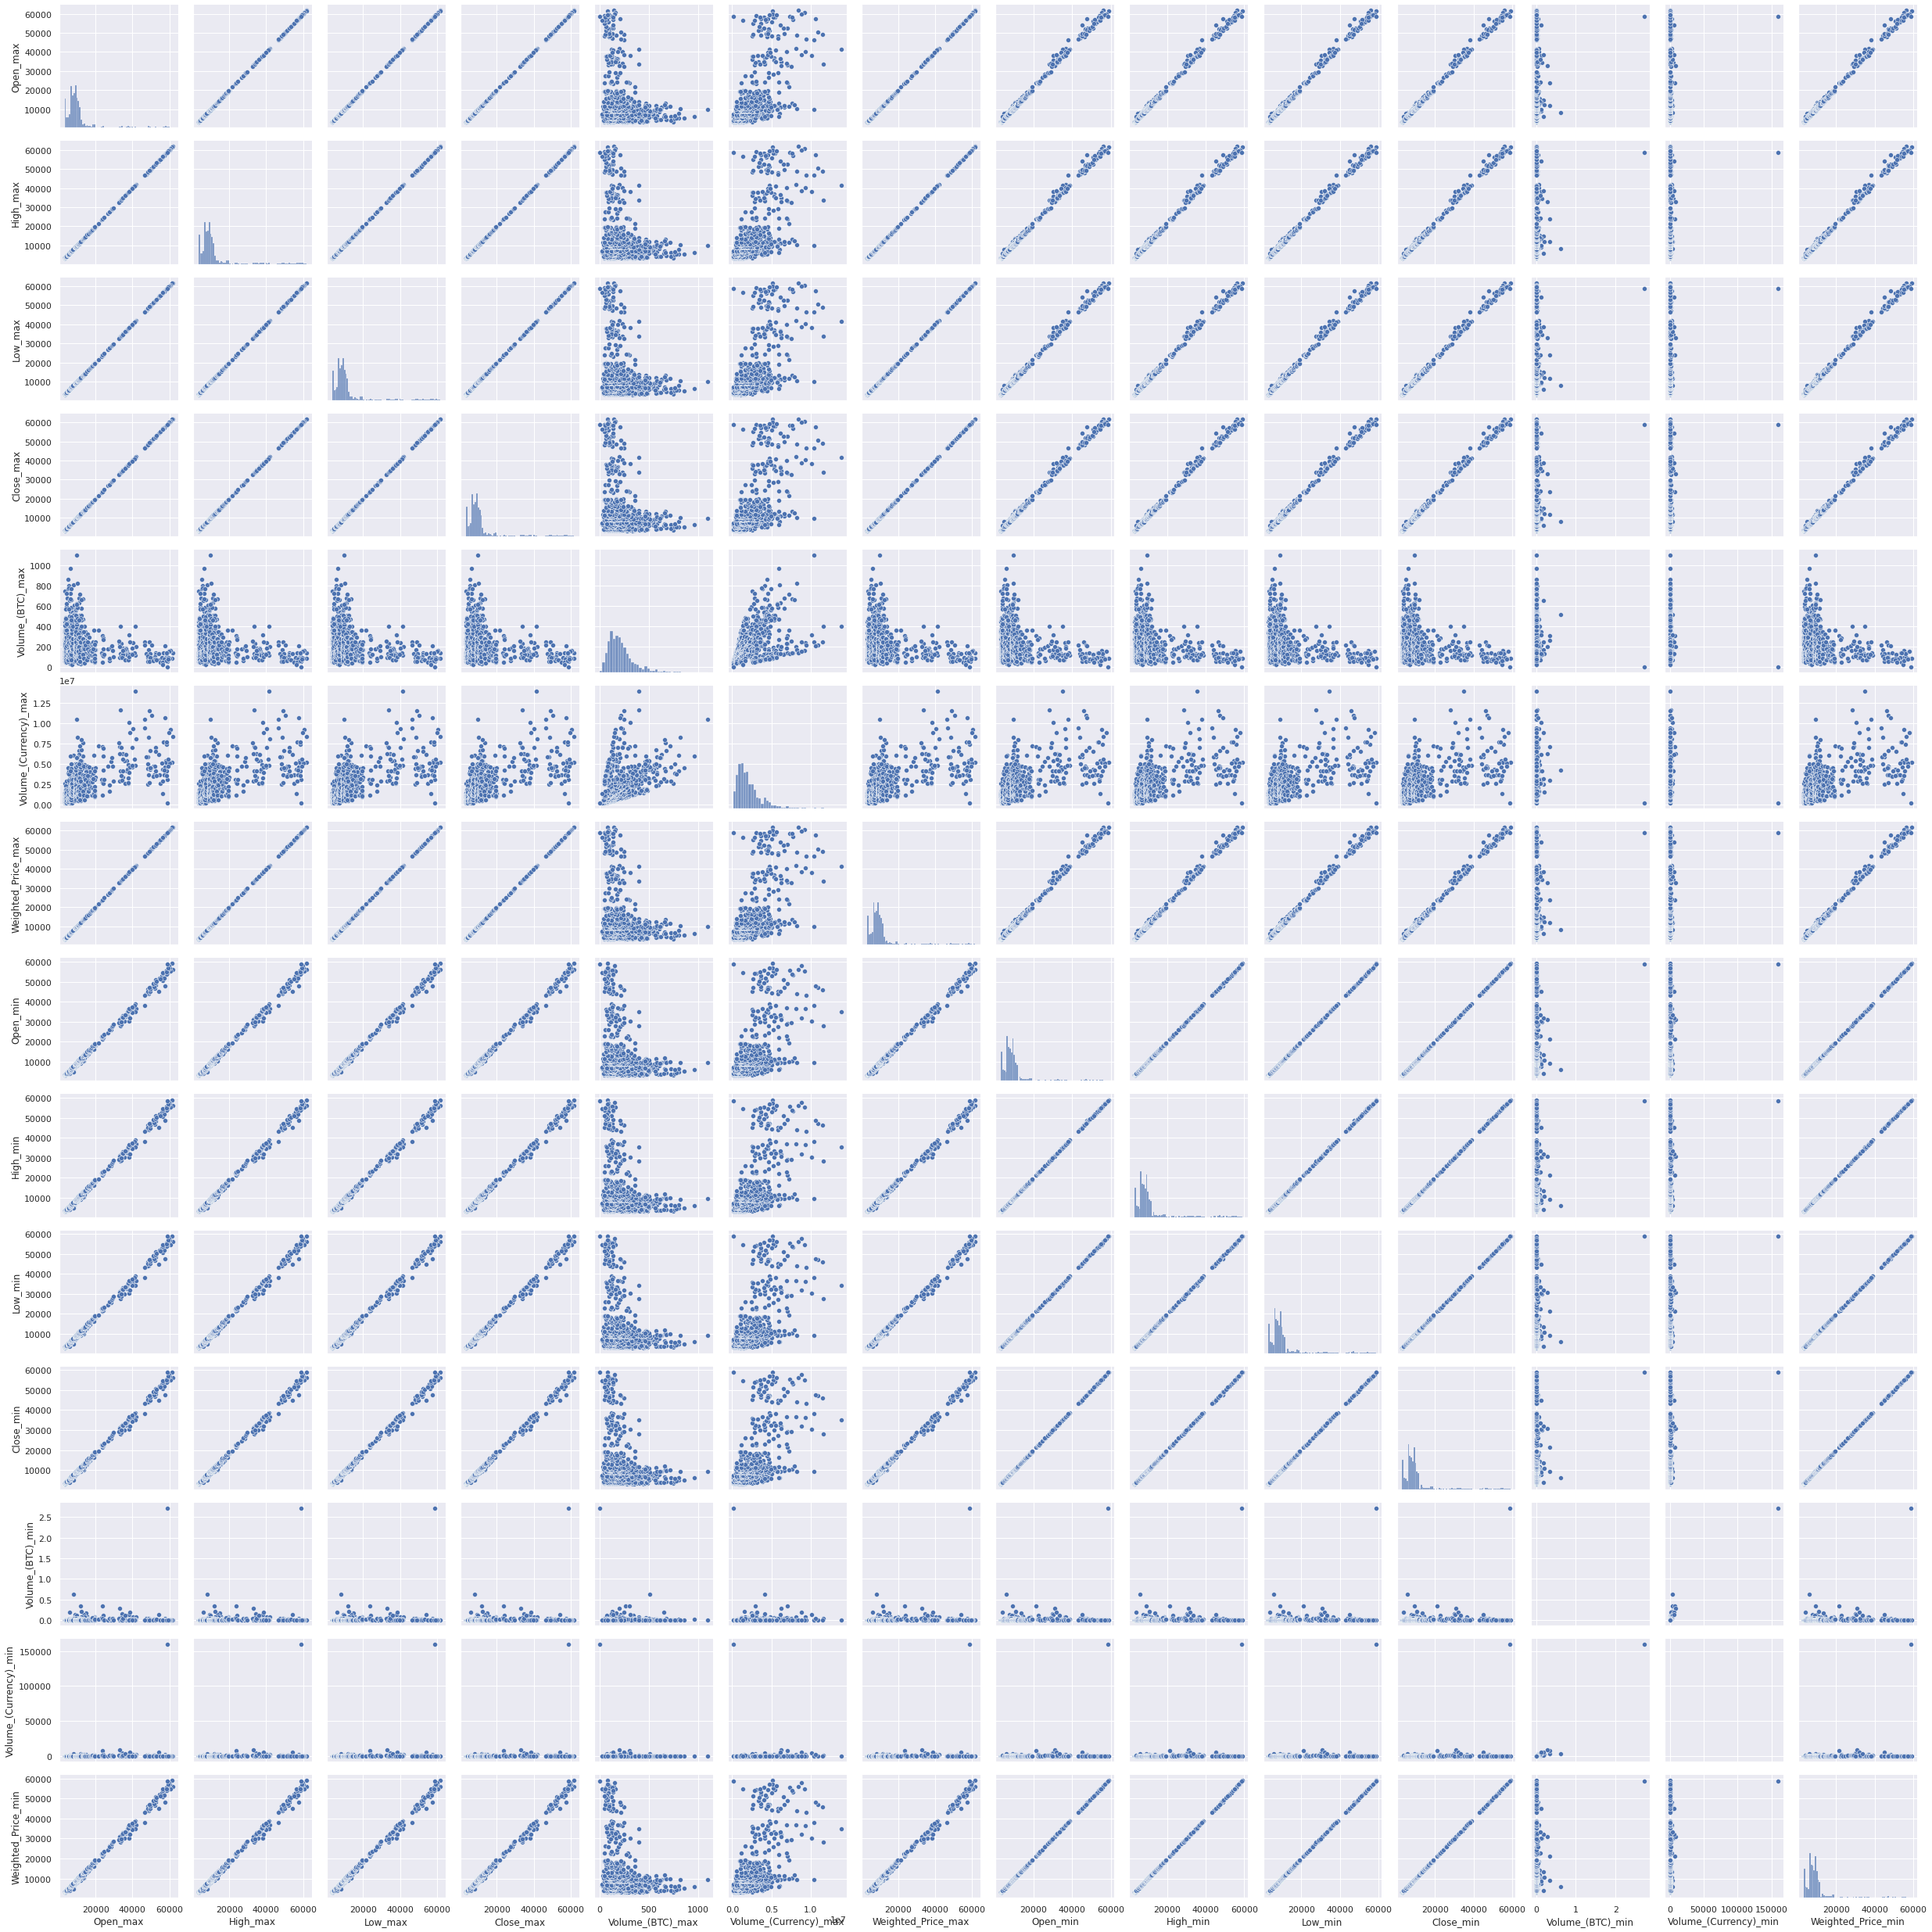

In [50]:
sns.pairplot(dfMaxMin_perDay[dfMaxMin_perDay.columns[:-1]])

<AxesSubplot:ylabel='Count'>

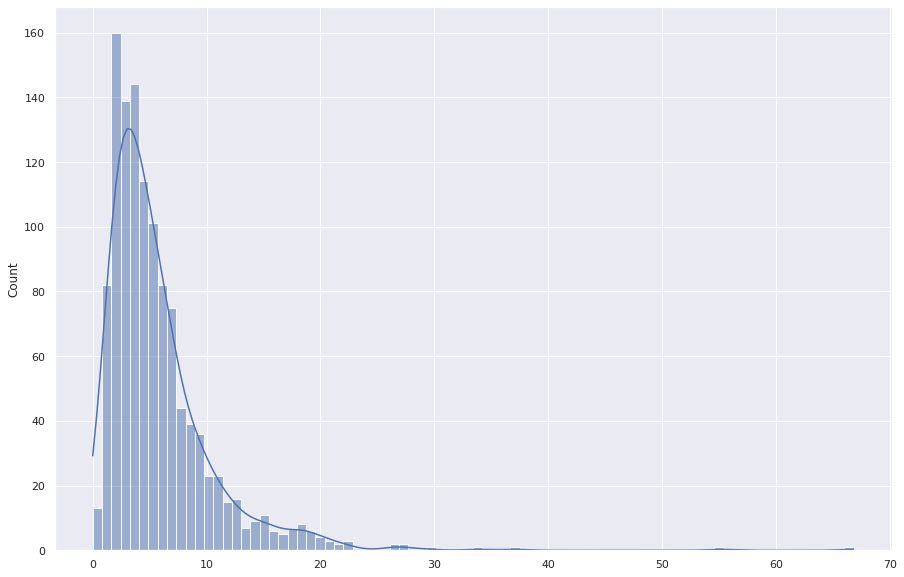

In [51]:
#variação percentual 
sns.histplot(x = ((dfMaxMin_perDay['Close_max'] - dfMaxMin_perDay['Open_min']) / dfMaxMin_perDay['Open_min']) * 100, kde = True)

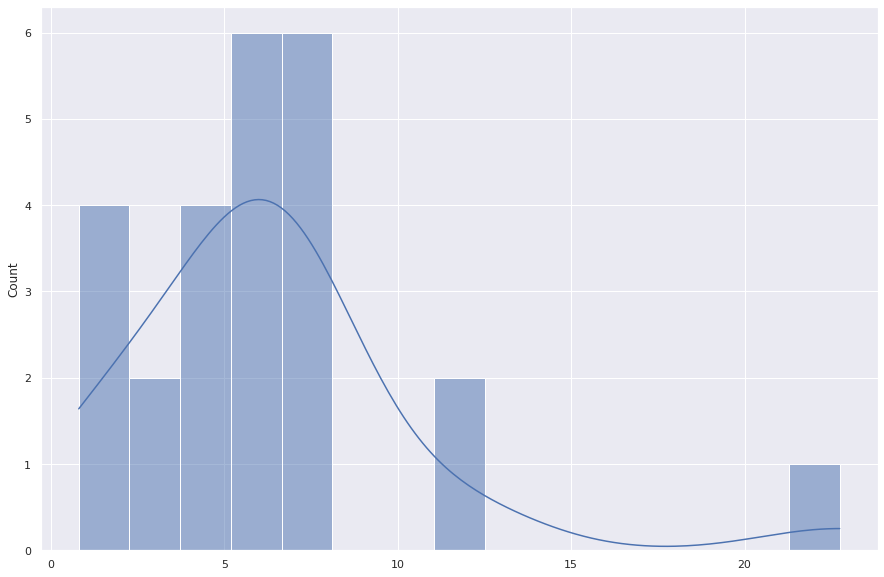

In [52]:
sns.histplot( x = ((dfMaxMin_perDay_OnlyOnTweets['Close_max'] - dfMaxMin_perDay_OnlyOnTweets['Open_min']) / dfMaxMin_perDay_OnlyOnTweets['Open_min']) * 100,  kde=True);

Aparenta o mesmo comprotamento, logo ele não teria influência sobre o mercado de bitcoin.

In [53]:
crypots = ((dfMaxMin_perDay_OnlyOnTweets['Close_max'] - dfMaxMin_perDay_OnlyOnTweets['Open_min']) / dfMaxMin_perDay_OnlyOnTweets['Open_min']) * 100
crypots.values

array([ 7.39628821, 12.36959578,  6.33044081,  2.84225466,  6.36513794,
        0.79879444,  2.65875065, 22.74127012,  1.44937301,  4.81371156,
        6.75443096,  1.82770942,  5.09448742,  7.47090019,  1.37425048,
        6.34024092,  5.0038802 ,  6.76774885,  6.04638391,  6.96525804,
        8.05835501, 11.11686767,  6.13316855,  6.59953347,  5.1571823 ])

In [54]:
mediaPop = ((dfMaxMin_perDay['Close_max'] - dfMaxMin_perDay['Open_min']) / dfMaxMin_perDay['Open_min']) * 100
mediaPop

Date
2018-01-01     8.578583
2018-01-02    17.874898
2018-01-03     6.107980
2018-01-04     8.473497
2018-01-05    15.387415
                ...    
2021-03-27     4.809519
2021-03-28     3.412343
2021-03-29     6.171779
2021-03-30     4.124824
2021-03-31     0.017748
Length: 1186, dtype: float64

In [55]:
mediaPop = np.mean(mediaPop)
mediaPop

5.769817666730019

In [56]:
mediaAmostragem = sum(crypots.values)/len(crypots.values)
mediaAmostragem

6.339040581777649

In [57]:
#Teste t 

#H0
#: a média da amostra é igual à média da referência (ou população).
#H1
#: a média da amostra é diferente à média da referência (ou população).

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp
#http://www.cpaqv.org/estatistica/tabelas_cpaqv.pdf
from scipy import stats

#grau de Liberdade
result = stats.ttest_1samp(crypots.values,mediaPop)
result.pvalue, result.statistic


(0.5248955644802022, 0.6452354508436751)

In [58]:
#Hipotese nula não pode ser rejeitada
result.pvalue < 0.05

False

### Análise dos tweets usando análise de sentimento VADER

In [59]:
sentimental = [sentiment_scores(i) for i in dfElonMusk_Bitcoin['tweet']]

In [60]:
dfElonMusk_Bitcoin['tweet'][3]

'Heard a rumor some crypto coin was pegging the dollar 🤣🤣'

In [61]:
for i in range(dfElonMusk_Bitcoin['tweet'].shape[0]):
    tw = dfElonMusk_Bitcoin['tweet'][i]
    print(f"Tweet {i + 1}: {sentimental[i]}: {tw}")

Tweet 1: Negative: BTC (Bitcoin) is an anagram of TBC(The Boring Company) What a coincidence!
Tweet 2: Neutral: Scammers &amp; crypto should get a room
Tweet 3: Neutral: Cryptocurrency explained  https://t.co/kUXaXx8a1R
Tweet 4: Positive: Heard a rumor some crypto coin was pegging the dollar 🤣🤣
Tweet 5: Negative: @PeterSchiff An email saying you have gold is not the same as having gold. You might as well have crypto.  Money is just data that allows us to avoid the inconvenience of barter.  That data, like all data, is subject to latency &amp; error. The system will evolve to that which minimizes both.
Tweet 6: Positive: @realfuckingnews @business Somehow, a hash text file using ancient crypto can be exchanged for real goods &amp; services!? Amazing.
Tweet 7: Negative: @business To be clear, I am *not* an investor, I am an engineer. I don’t even own any publicly traded stock besides Tesla.   However, when fiat currency has negative real interest, only a fool wouldn’t look elsewhere.   B

In [62]:
dfSentimento = dfElonMusk_Bitcoin.copy().sort_index()
dfSentimento["Sentimento"] = sentimental

In [63]:
dfMaxMin_perDay_OnlyOnTweets["variacao"] = ((dfMaxMin_perDay_OnlyOnTweets['Close_max'] - dfMaxMin_perDay_OnlyOnTweets['Open_min'])*100/ dfMaxMin_perDay_OnlyOnTweets['Open_min']).values

In [64]:
dfSentimento["variacao"] = dfMaxMin_perDay_OnlyOnTweets["variacao"]

In [65]:
dfSentimento

,nretweets,nlikes,tweet,nreplies,Sentimento,variacao
2018-01-29,15744,105075,"But wait, there’s more: the flamethrower is se...",2510,Negative,7.396288
2018-02-22,120,1161,@DeadlyBananas @MichaelAVaughn Not sure. I let...,161,Neutral,12.369596
2018-02-25,162,1558,@cheresh @andrestaltz End-to-end encryption en...,91,Neutral,6.330441
2018-05-05,6859,50360,Cryptocandy,1868,Positive,2.842255
2018-05-24,111,3294,@CryptoAlesio Yo,25,Negative,6.365138
2018-10-22,7379,23751,@vicentes @Grimezsz Wanna buy some Bitcoin? 😉😉...,1063,Positive,0.798794
2019-02-21,2092,44605,"@coindesk That said, I still only own 0.25 BTC...",1316,Negative,2.658751
2019-04-02,2428,9063,@Tom_Heats Dogecoin might be my fav cryptocurr...,558,Negative,22.741270
2019-04-13,1772,8379,@CryptoCobain Cryptocurrency is my safe word,324,Negative,1.449373
2019-05-07,222,6397,@CryptoNekoZ @Tesla Click checkbox under “Adva...,66,Positive,4.813712


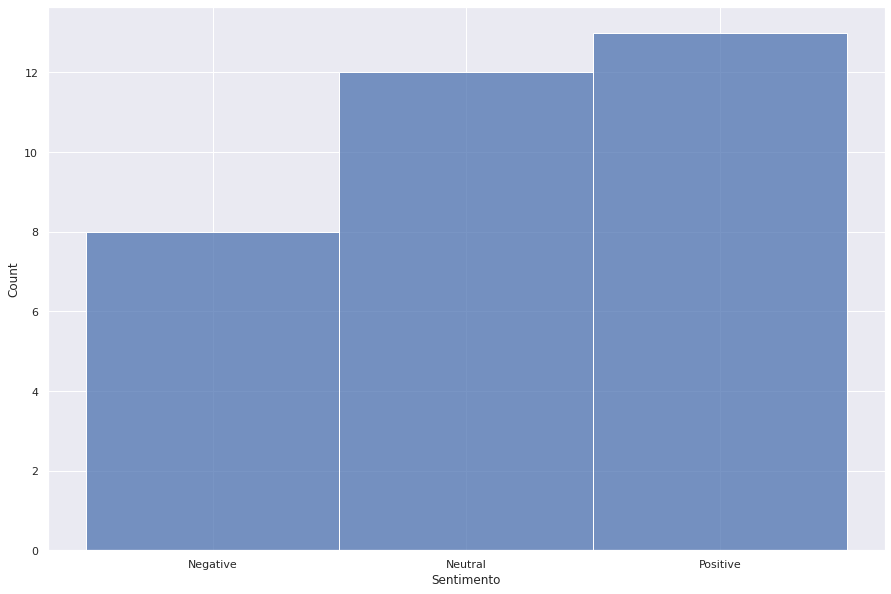

In [66]:
sns.histplot(data = dfSentimento["Sentimento"]);

In [67]:
dfSentimento.groupby("Sentimento").mean()

,nretweets,nlikes,nreplies,variacao
Sentimento,,,,
Negative,7530.875000,61114.375000,3119.000000,7.224282
Neutral,12148.083333,86408.666667,3777.416667,6.942001
Positive,7431.230769,77613.153846,3128.461538,5.861655


In [68]:
#Media das variações para tipo de sentimento
{"Media "+i:dfSentimento.loc[dfSentimento['Sentimento']==i,"variacao"].mean() for i in dfSentimento['Sentimento'].unique()}

{'Media Negative': 7.224281571761069,
 'Media Neutral': 6.94200142883734,
 'Media Positive': 5.861655079371804}

## Base de bitcoins geral

A base é grande, mais de 1 milhão de tweets, estou pegando aprox. 1% por enquanto

Essa base só começou a ser pega no começo de 2021, a outra é maior e de 2016-2019, provavelmente vamos juntar as duas

In [205]:
import random

p = 0.01

In [206]:
df_bitcoinGeral = pd.read_csv("Data/Bitcoin_tweets.csv", skiprows=lambda i: i>0 and random.random() > p)

In [207]:
df_bitcoinGeral.dtypes # precisamos converter as columnas numéricas para numeros depois

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends        float64
user_favourites     float64
user_verified          bool
date                 object
text                 object
hashtags             object
source               object
is_retweet           object
dtype: object

In [208]:
df_bitcoinGeral

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Kur Ne Oldu,Turkey,Günlük Döviz Kurları /\n\nDaily Currency Excha...,2019-02-11 08:43:21,4154.0,76.0,45.0,False,2021-02-10 23:00:02,"⏰ 02:00\n₿ Bitcoin = 45.242,9892 $\n#bitcoin #...","['bitcoin', 'btc', 'BTCUSD']",KurNeOldu,False
1,cryptoZIM,Not financial advice.,#bitcoin,2020-07-16 15:51:32,108.0,464.0,13091.0,False,2021-02-10 22:26:37,@Fxhedgers Power play: Twitter announces #bitc...,"['bitcoin', 'btc']",Twitter Web App,False
2,Cryptocurrencies / USD,NaN,Stay updated on the main cryptocurrencies of t...,2018-08-02 10:06:05,3910.0,1.0,10.0,False,2021-02-10 22:09:29,🔄 Prices update in $USD (1 hour):\n\n$BTC - ...,NaN,Cryptocurrencies prices to USD,False
3,Smoother Man,NaN,"Success Motivator, Inspirational, Boss life te...",2014-04-09 17:51:05,49.0,90.0,1169.0,False,2021-02-10 22:07:02,Start your #Bitcoin investing today and Get $1...,"['Bitcoin', 'BTC', 'bitcoins']",Twitter Web App,False
4,Forex Zone,United States,The Forex Zone forum is for #Traders about eve...,2018-08-09 18:00:38,93.0,58.0,4730.0,False,2021-02-10 21:35:56,Congratulations to Forex Zone member 'kawanlam...,NaN,Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12400,Lmfao,NaN,NaN,2020-09-23 19:08:19,5.0,149.0,62.0,False,2021-09-10 21:47:27,@beasties_online I believe in this project. ...,"['BSC', 'BTC', 'BNB', 'gamefi', 'playtoearn', ...",Twitter Web App,False
12401,John Max,"Texas, US",Algo Trader. \nFinancial analyst.\nAffiliate m...,2021-09-09 00:32:01,7.0,110.0,8.0,False,2021-09-10 21:31:00,You see that right??\nYou're too old if you do...,"['Btc', 'cryptotrading', 'algotrading']",Twitter Web App,False
12402,that..1..guy,NaN,NaN,2021-06-06 22:19:51,15.0,63.0,577.0,False,2021-09-10 21:26:39,@FirecatBlitzz @VaultDeFi Green Bay packers #BTC,['BTC'],Twitter for iPhone,False
12403,Sam @ teslify,"Zug, Schweiz",polyglot ENTJ trader@teslify_ch 会说中文 #BitCoin,2020-07-25 08:17:49,14.0,125.0,891.0,False,2021-09-10 21:24:25,@Codie_Sanchez so what’s better than #btc really?,['btc'],Twitter for iPhone,False


In [209]:
colunas_relevantes = ["user_followers", "user_friends", "user_favourites", "user_verified", "date", "text", "hashtags", "is_retweet"]

In [210]:
df_bitcoinGeral = df_bitcoinGeral[colunas_relevantes]
df_bitcoinGeral = df_bitcoinGeral.sort_values(by="date")

In [211]:
df_bitcoinGeral['date'].count() # há algumas entradas com NaT (entra nula de data, como iremos transformar a data para o index, tiramos essas linhas)

12405

In [212]:
df_bitcoinGeral['date'] = pd.to_datetime(df_bitcoinGeral['date'], errors = "coerce")

In [213]:
df_bitcoinGeral = df_bitcoinGeral.dropna(axis = 0, how = "any", subset = ["date"])

In [214]:
df_bitcoinGeral = df_bitcoinGeral.rename(columns={"date": "Date"})

In [215]:
df_bitcoinGeral = df_bitcoinGeral.set_index("Date")

In [216]:
# talvez parse json str -> python list

In [217]:
numerical_columns = ["user_followers", "user_friends", "user_favourites"]

In [218]:
def custom_to_int(x):
    return pd.to_numeric(x, downcast="integer", errors="coerce")

In [219]:
df_bitcoinGeral[numerical_columns] = df_bitcoinGeral[numerical_columns].apply(custom_to_int)

In [220]:
bool_columns = ["user_verified", "is_retweet"]

In [221]:
for boolcolumn in bool_columns:
    df_bitcoinGeral[boolcolumn] = df_bitcoinGeral[boolcolumn].astype(bool)

In [222]:
df_bitcoinGeral

,user_followers,user_friends,user_favourites,user_verified,text,hashtags,is_retweet
Date,,,,,,,
2021-02-05 10:52:26,37,123,410,False,#reddcoin #rdd @reddcoin to the moon #altcoin ...,"['reddcoin', 'rdd', 'altcoin', 'turnreddcoinin...",False
2021-02-05 11:53:53,271,362,14394,False,"@MyLegacyKit Just to compare, my full #Bitcoin...","['Bitcoin', 'BTC']",False
2021-02-05 12:25:47,273,221,189,False,"#cryptocurrency how it works, discussed in dep...",['cryptocurrency'],False
2021-02-05 13:41:15,4781,3471,52707,False,USA's #1 #Bitcoin ATM\n\n*Use JMACK37 For 10% ...,['Bitcoin'],False
2021-02-05 14:58:36,497,489,13189,False,This is our ceo! So much to come for $mrx! Che...,['metrixcoin'],False
...,...,...,...,...,...,...,...
2021-09-10 23:27:40,16886,8,144,False,🚀🚀🚀 $DYDX Long Position(v1) 🚀🚀🚀\nEntry Price: ...,"['Binance', 'Bitcoin', 'Signals', 'Buy', 'DYDX...",False
2021-09-10 23:30:03,464,23,1,False,"[₿] #Bitcoin Daily $BTC [₿]\n\nKraken❯\nA:$44,...",['Bitcoin'],False
2021-09-10 23:33:01,5,84,186,False,@PeterSchiff You wouldn’t be talking about #bi...,['bitcoin'],False


In [223]:
df_bitcoinGeral.dtypes # agora os tipos estão conforme o esperado

user_followers      int32
user_friends        int32
user_favourites     int32
user_verified        bool
text               object
hashtags           object
is_retweet           bool
dtype: object

In [224]:
df_bitcoinGeral["hashtags"] = df_bitcoinGeral["hashtags"].astype(str)

Fazendo uma limpeza agressiva (dropar todas as linhas que tenham uma valor qualquer nulo), a única coluna que tem valores nulos é a de "hashtag" o que tudo bem

In [225]:
df_bitcoinGeral.dropna()
# o tamanho não se modifica (se tirarmos o subset e a conversão das hashtags acima sim, porque há tweets sem hashtags)
# cerca de 1% dos tweets não usa hashtag, isso talvez sugira que a base foi coletada com alguma heurística de hashtags

,user_followers,user_friends,user_favourites,user_verified,text,hashtags,is_retweet
Date,,,,,,,
2021-02-05 10:52:26,37,123,410,False,#reddcoin #rdd @reddcoin to the moon #altcoin ...,"['reddcoin', 'rdd', 'altcoin', 'turnreddcoinin...",False
2021-02-05 11:53:53,271,362,14394,False,"@MyLegacyKit Just to compare, my full #Bitcoin...","['Bitcoin', 'BTC']",False
2021-02-05 12:25:47,273,221,189,False,"#cryptocurrency how it works, discussed in dep...",['cryptocurrency'],False
2021-02-05 13:41:15,4781,3471,52707,False,USA's #1 #Bitcoin ATM\n\n*Use JMACK37 For 10% ...,['Bitcoin'],False
2021-02-05 14:58:36,497,489,13189,False,This is our ceo! So much to come for $mrx! Che...,['metrixcoin'],False
...,...,...,...,...,...,...,...
2021-09-10 23:27:40,16886,8,144,False,🚀🚀🚀 $DYDX Long Position(v1) 🚀🚀🚀\nEntry Price: ...,"['Binance', 'Bitcoin', 'Signals', 'Buy', 'DYDX...",False
2021-09-10 23:30:03,464,23,1,False,"[₿] #Bitcoin Daily $BTC [₿]\n\nKraken❯\nA:$44,...",['Bitcoin'],False
2021-09-10 23:33:01,5,84,186,False,@PeterSchiff You wouldn’t be talking about #bi...,['bitcoin'],False


In [228]:
df_bitcoinGeral = df_bitcoinGeral.set_index(pd.to_datetime(df_bitcoinGeral.index.date))

In [229]:
df_bitcoinGeral.index.name = 'Date'

In [230]:
valid_days = set(df_bitcoinGeral.index)

In [231]:
len(valid_days)

78

In [232]:
pd.to_datetime("2021-02-05") in valid_days

True

In [233]:
pd.to_datetime("2021-02-11") in valid_days # há dias sem tweet?

False

In [234]:
df_bitcoinGeral.index

DatetimeIndex(['2021-02-05', '2021-02-05', '2021-02-05', '2021-02-05',
               '2021-02-05', '2021-02-05', '2021-02-05', '2021-02-05',
               '2021-02-05', '2021-02-05',
               ...
               '2021-09-10', '2021-09-10', '2021-09-10', '2021-09-10',
               '2021-09-10', '2021-09-10', '2021-09-10', '2021-09-10',
               '2021-09-10', '2021-09-10'],
              dtype='datetime64[ns]', name='Date', length=12405, freq=None)

In [235]:
%%time
sentimental_geral = [sentiment_scores(i) for i in df_bitcoinGeral['text']]

CPU times: user 1min 26s, sys: 1.22 s, total: 1min 28s
Wall time: 1min 28s


In [236]:
# talvez tweets com sentimento positivo são mais influentes/mais favoritados?

In [237]:
df_bitcoinGeral["sentimento"] = sentimental_geral

In [238]:
df_bitcoinGeral

,user_followers,user_friends,user_favourites,user_verified,text,hashtags,is_retweet,sentimento
Date,,,,,,,,
2021-02-05,37,123,410,False,#reddcoin #rdd @reddcoin to the moon #altcoin ...,"['reddcoin', 'rdd', 'altcoin', 'turnreddcoinin...",False,Neutral
2021-02-05,271,362,14394,False,"@MyLegacyKit Just to compare, my full #Bitcoin...","['Bitcoin', 'BTC']",False,Neutral
2021-02-05,273,221,189,False,"#cryptocurrency how it works, discussed in dep...",['cryptocurrency'],False,Neutral
2021-02-05,4781,3471,52707,False,USA's #1 #Bitcoin ATM\n\n*Use JMACK37 For 10% ...,['Bitcoin'],False,Neutral
2021-02-05,497,489,13189,False,This is our ceo! So much to come for $mrx! Che...,['metrixcoin'],False,Positive
...,...,...,...,...,...,...,...,...
2021-09-10,16886,8,144,False,🚀🚀🚀 $DYDX Long Position(v1) 🚀🚀🚀\nEntry Price: ...,"['Binance', 'Bitcoin', 'Signals', 'Buy', 'DYDX...",False,Neutral
2021-09-10,464,23,1,False,"[₿] #Bitcoin Daily $BTC [₿]\n\nKraken❯\nA:$44,...",['Bitcoin'],False,Neutral
2021-09-10,5,84,186,False,@PeterSchiff You wouldn’t be talking about #bi...,['bitcoin'],False,Negative


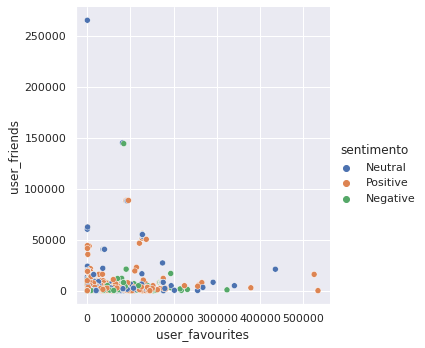

In [239]:
sns.relplot(x="user_favourites", y="user_friends", data=df_bitcoinGeral, hue = "sentimento")

CPU times: user 2.47 s, sys: 260 ms, total: 2.73 s
Wall time: 2.21 s


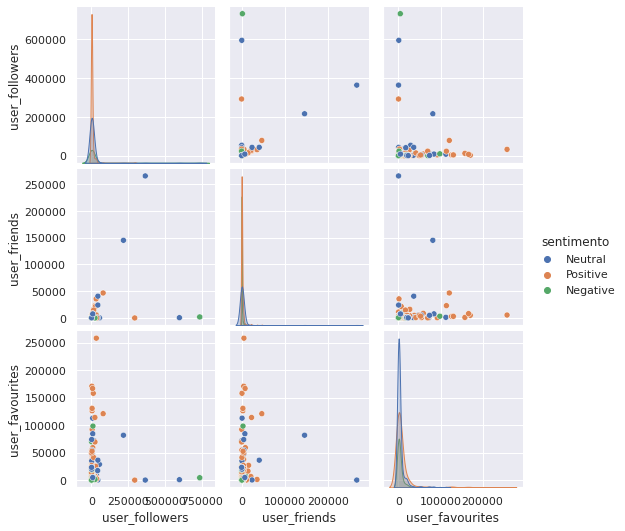

In [240]:
%%time
sns.pairplot(df_bitcoinGeral[["user_followers", "user_friends", "user_favourites", "sentimento"]].reset_index().iloc[0:1000], hue = "sentimento")

CPU times: user 6.35 s, sys: 190 ms, total: 6.54 s
Wall time: 6.16 s


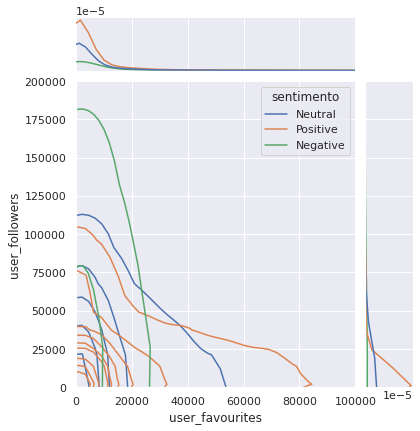

In [244]:
%%time
sns.jointplot(data=df_bitcoinGeral[["user_followers", "user_friends", "user_favourites", "sentimento"]].reset_index().iloc[0:10000],
              x="user_favourites", y="user_followers", hue="sentimento", kind="kde", xlim=[0, 100000], ylim=[0, 0.2e6])

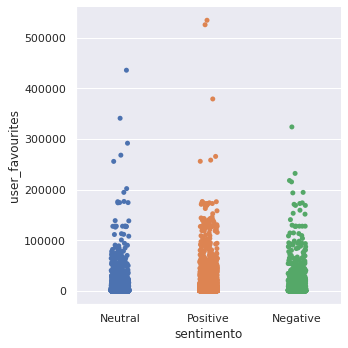

In [245]:
sns.catplot(x="sentimento", y="user_favourites", data=df_bitcoinGeral[["user_followers", "user_friends", "user_favourites", "sentimento"]].reset_index().iloc[0:10000])

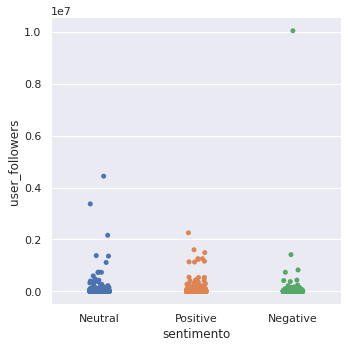

In [246]:
sns.catplot(x="sentimento", y="user_followers", data=df_bitcoinGeral[["user_followers", "user_friends", "user_favourites", "sentimento"]].reset_index().iloc[0:10000])

In [247]:
df_bitcoinGeral["isPositive"] = df_bitcoinGeral["sentimento"] == "Positive"
df_bitcoinGeral["isNeutral"] = df_bitcoinGeral["sentimento"] == "Neutral"
df_bitcoinGeral["isNegative"] = df_bitcoinGeral["sentimento"] == "Negative"

In [248]:
df_bitcoinSentimentos = df_bitcoinGeral.groupby("Date").sum()[["isPositive", "isNeutral", "isNegative"]]

In [249]:
df_bitcoinSentimentos

,isPositive,isNeutral,isNegative
Date,,,
2021-02-05,4,14,1
2021-02-06,14,10,4
2021-02-07,11,15,4
2021-02-08,27,23,9
2021-02-09,19,25,6
...,...,...,...
2021-08-23,51,33,18
2021-08-24,155,91,28
2021-08-25,333,99,55


In [250]:
dfMaxMin_perDay["isPositive"] = df_bitcoinSentimentos["isPositive"]
dfMaxMin_perDay["isNeutral"] = df_bitcoinSentimentos["isNeutral"]
dfMaxMin_perDay["isNegative"] = df_bitcoinSentimentos["isNegative"]

In [259]:
df_bitcoinSentimentos = df_bitcoinSentimentos.set_index(df_bitcoinSentimentos.index.astype(str))

In [261]:
set(df_bitcoinSentimentos.index).intersection(set(dfMaxMin_perDay.index))

set()

A base selecionada de tweets gerais não tem interseção com a base do preço do bitcoin, combinar com a outra base (de 2016-2019)

In [ ]:
# não alterado abaixo

### Análise para DogeCoin


In [ ]:
#tratar as coisas da dogecoin como fiz com elon musk
#https://www.kaggle.com/dhruvildave/dogecoin-historical-data
doge = pd.read_csv('C:/Banjos/DataSets/DOGE-USD.csv')
doge


In [ ]:
doge.isnull().sum()

In [ ]:
doge = doge.dropna(how="all",subset=doge.columns[1:])
doge

In [ ]:
#olhando apenas em 2021
dataIni='2021-1-1'
#data final
dataFim='2021-10-1'



In [ ]:
dfResumido = doge.copy()

dfResumido = dfResumido.rename(columns={"Date": "date"})

dfResumido["date"]  = pd.to_datetime(dfResumido['date'])
dfResumido = dfResumido.loc[(dfResumido['date'] >=dataIni)& (dfResumido['date'] <=dataFim) ] 
dfResumido["date"]  = pd.to_datetime(dfResumido['date'])

dfResumido

In [ ]:
#linhas em que são citados o dogecoin
dogeDf = dfElos[dfElos["tweet"].str.contains("dogecoin|doge coin|Dogecoin|Doge coin|doge|Doge|Crypto|Cryptocurrency " , na=False)]

dogeDf


In [ ]:
dogeDf.shape

In [ ]:
dogeDf['date'].nunique()

In [ ]:
#vê o preço no dia anterior e posterior aos tweets
dfInter = dfResumido.loc[np.isin(dfResumido['date'].dt.date,pd.Series(list(set(dfResumido['date'].dt.date).intersection(set(dogeDf['date'])))).values) ]

#base com o resultado do final do dia
dfInter

In [ ]:
dfInter.shape

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,10))
sns.lineplot(data= dfResumido , x="date", y="Close",ax=ax1)
plt.show()

In [ ]:
#variação percentual 
sns.histplot( x = ((dfResumido['Close'] - dfResumido['Open'])/ dfResumido['Open'])*100, kde=True);

In [ ]:
#histograma da variação percectual no dias do tweet do elon musk
sns.histplot( x = ((dfInter['Close'] - dfInter['Open'])/ dfInter['Open'])*100,  kde=True);

In [ ]:
#olhando todos os ponto separadamente
sns.histplot( x = ((dfInter['Close'] - dfInter['Open'])/ dfInter['Open'])*100,  kde=True, bins=dfInter.shape[0] );

In [ ]:
crypots = ((dfInter['Close'] - dfInter['Open'])/ dfInter['Open'])*100

mediaAmostragem = sum(crypots.values)/len(crypots.values)
#Teste t 

#H0
#: a média da amostra é igual à média da referência (ou população).
#H1
#: a média da amostra é diferente à média da referência (ou população).

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp
#http://www.cpaqv.org/estatistica/tabelas_cpaqv.pdf

#grau de Liberdade
result = stats.ttest_1samp(crypots.values,mediaPop)
result.pvalue < 0.05




### Análise dos tweets usando análise de sentimento VADER

In [ ]:
sentimental = [sentiment_scores(i) for i in dogeDf['tweet']]
dfSentimento = dogeDf.copy()
dfSentimento["Sentimento"] = sentimental
dfSentimento =dfSentimento.loc[(dfSentimento['date'] >=pd.to_datetime(dataIni))& (dfSentimento['date'] <=pd.to_datetime(dataFim)) ] 
dfSentimento['date']  = pd.to_datetime( dfSentimento['date'])
dfInter["variacao"] = ((dfInter['Close'] - dfInter['Open'])*100/ dfInter['Open']).values
dfSentimento["variacao"] = [dfInter.loc[dfInter["date"]==i,"variacao"].values[0] for i in dfSentimento['date']]
dfSentimento

In [ ]:
sns.histplot( x =dfSentimento["Sentimento"]);

In [ ]:
#Media das variações para tipo de sentimento
{"Media "+i:dfSentimento.loc[dfSentimento['Sentimento']==i,"variacao"].mean() for i in dfSentimento['Sentimento'].unique()}
